In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
train_df = pd.read_csv("train.csv")

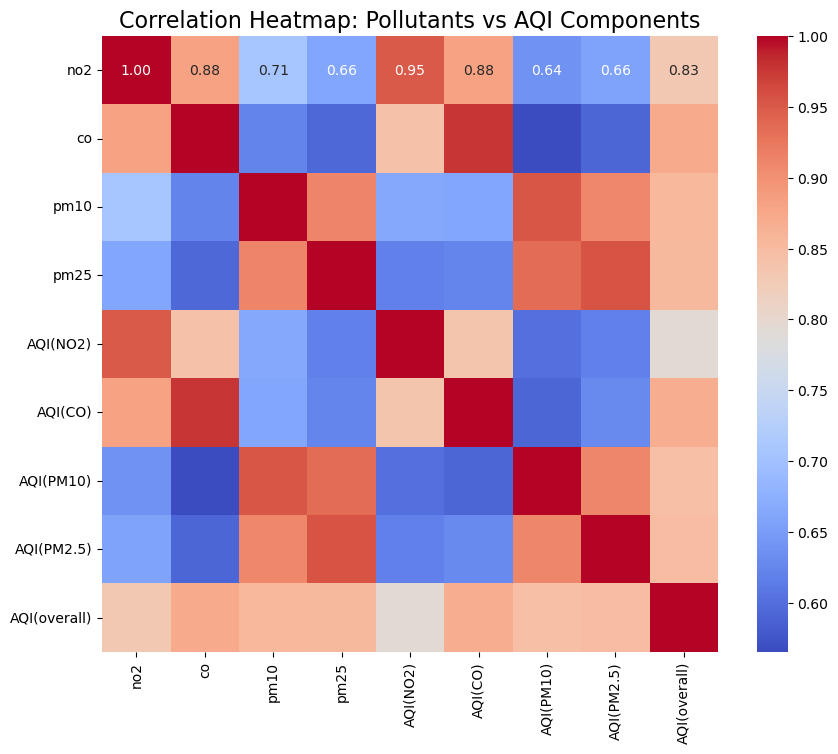

In [3]:
# Compute correlation matrix
corr_matrix = train_df[['no2', 'co', 'pm10', 'pm25', 
                        'AQI(NO2)', 'AQI(CO)', 'AQI(PM10)', 
                        'AQI(PM2.5)', 'AQI(overall)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Heatmap: Pollutants vs AQI Components", fontsize=16)
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load dataset
train_df = pd.read_csv("train.csv")

In [6]:
# Clean infinite and missing values
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)

In [7]:
# Feature and target columns
feature_cols = ['no2', 'co', 'pm10', 'pm25', 'AQI(NO2)', 'AQI(CO)', 'AQI(PM10)', 'AQI(PM2.5)']
target_col = 'AQI(overall)'

In [8]:
# Sample 50,000 rows to reduce training time
sample_df = train_df.sample(n=50000, random_state=42)

In [9]:
# Define features and target
X = sample_df[feature_cols]
y = sample_df[target_col]

In [10]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize and train the model (using all CPU cores)
model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [12]:
# Predict on validation set
y_pred = model.predict(X_val)

In [13]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.4f}")


✅ RMSE: 0.58
✅ R² Score: 1.0000


In [14]:
import joblib
joblib.dump(model, 'aqi_rf_model.pkl')

['aqi_rf_model.pkl']

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the dataset
df = pd.read_csv("train.csv")

# Drop rows with missing or infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Feature and target columns
feature_cols = ['no2', 'co', 'pm10', 'pm25', 'AQI(NO2)', 'AQI(CO)', 'AQI(PM10)', 'AQI(PM2.5)']
target_col = 'AQI(overall)'

# Sample 50,000 rows for faster training
sample_df = df.sample(n=50000, random_state=42)

# Split into features and target
X = sample_df[feature_cols]
y = sample_df[target_col]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.4f}")

# Save the model (compatible with scikit-learn 1.6.1)
joblib.dump(model, "aqi_rf_model.pkl")
print("✅ Model saved as 'aqi_rf_model.pkl'")

✅ RMSE: 0.58
✅ R² Score: 1.0000
✅ Model saved as 'aqi_rf_model.pkl'


In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load and clean dataset
df = pd.read_csv("train.csv")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Feature and target columns
feature_cols = ['no2', 'co', 'pm10', 'pm25', 'AQI(NO2)', 'AQI(CO)', 'AQI(PM10)', 'AQI(PM2.5)']
target_col = 'AQI(overall)'

# Sample for faster training
sample_df = df.sample(n=50000, random_state=42)
X = sample_df[feature_cols]
y = sample_df[target_col]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.4f}")

# Save model
joblib.dump(model, "aqi_xgb_model.pkl")
print("✅ Model saved as 'aqi_xgb_model.pkl'")

✅ RMSE: 1.35
✅ R² Score: 0.9999
✅ Model saved as 'aqi_xgb_model.pkl'
